### Importacoes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import DataReader

### DataFrame

In [2]:
end = pd.to_datetime('today')
start = end - np.timedelta64(1, 'Y')

base = pd.DataFrame(DataReader('BBDC4.SA', 'yahoo', start, end))
# df.head()

In [15]:
df = pd.DataFrame(base.copy())

In [16]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-09,21.163635,20.236362,20.636362,20.354546,41548320.0,19.814739
2020-04-13,20.881819,19.818180,20.336363,20.881819,35536600.0,20.328024
2020-04-14,22.059999,21.110001,21.500000,21.110001,34432600.0,20.550161
2020-04-15,21.059999,20.400000,20.740000,20.500000,36230700.0,19.956333
2020-04-16,20.840000,19.910000,20.820000,19.969999,29284000.0,19.440390
...,...,...,...,...,...,...
2021-04-05,26.280001,25.799999,26.120001,26.010000,32588200.0,26.010000
2021-04-06,26.200001,25.410000,26.059999,25.600000,30309900.0,25.600000
2021-04-07,25.760000,25.209999,25.500000,25.320000,33365700.0,25.320000


### funcoes

In [29]:
# medias simples, desliza em uma serie/df um determindado numero de periodoso padrao 20
def medias_delizantes(serie, periodos=20):
    df = pd.DataFrame(serie.rolling(window=periodos).mean())
    df.columns = [f'mean_{periodos}']
    return df

In [30]:
# retorna um DataFrame, para concatenar ao df, original
def media_exponencial_deslizante(df, periodos=10):
    df_mme = pd.DataFrame(pd.core.window.ExponentialMovingWindow(df, periodos).mean())
    df_mme.columns = [f'mme_{periodos}']
    return df_mme

In [31]:
# Recebe um Serie, retorna um df com a linha macd e o sinal
def macd(df, curta=12, longa=26, sinal=9):
    a = media_exponencial(df, curta)
    b = media_exponencial(df, longa)
    df_macd = pd.DataFrame(a.values - b.values)
    df_macd.columns = ['macd']
    df_macd[f'mme_macd_{sinal}'] = media_exponencial(df_macd, sinal)
    return  df_macd

### Area Teste

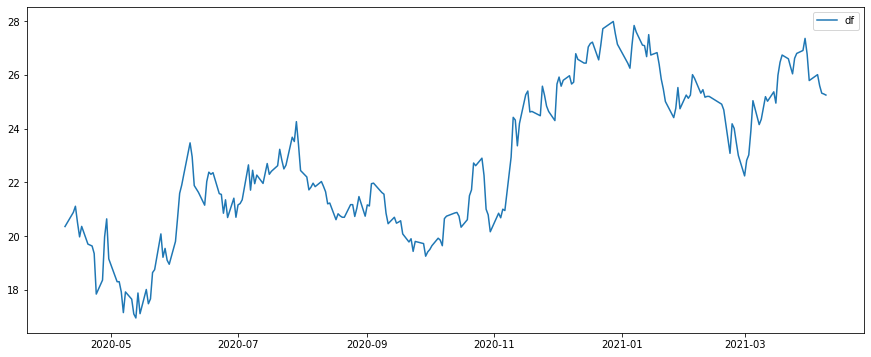

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='df')


plt.legend()
plt.show()

In [24]:
a = media_exponencial(df['Close'], 12)
b = media_exponencial(df['Close'], 26)
df_completo = pd.concat([df['Close'], a, b], axis=1)

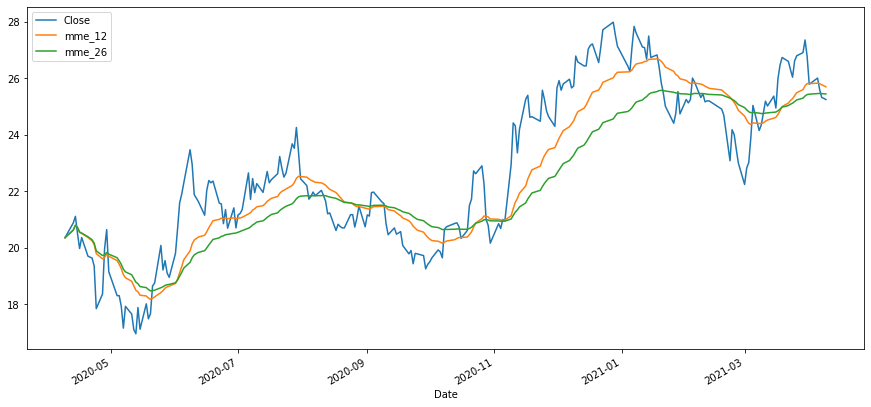

In [25]:
df_completo.plot(figsize=(15, 7))
plt.show()

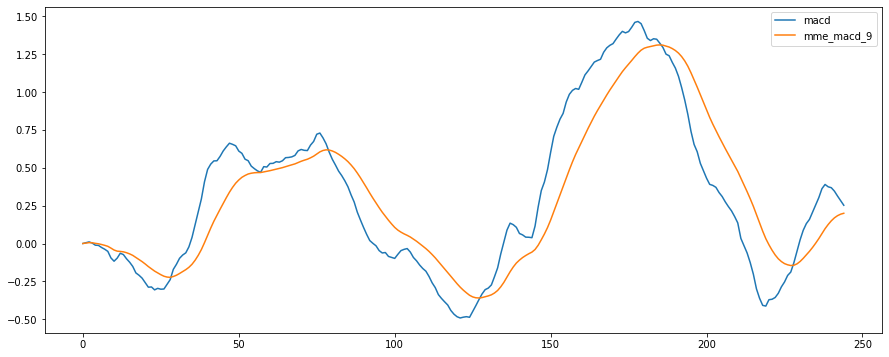

In [41]:
macd(df['Close']).plot(figsize=(15, 6))
plt.show()

In [28]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-09,21.163635,20.236362,20.636362,20.354546,41548320.0,19.814739
2020-04-13,20.881819,19.818180,20.336363,20.881819,35536600.0,20.328024
2020-04-14,22.059999,21.110001,21.500000,21.110001,34432600.0,20.550161
2020-04-15,21.059999,20.400000,20.740000,20.500000,36230700.0,19.956333
2020-04-16,20.840000,19.910000,20.820000,19.969999,29284000.0,19.440390
...,...,...,...,...,...,...
2021-04-05,26.280001,25.799999,26.120001,26.010000,32588200.0,26.010000
2021-04-06,26.200001,25.410000,26.059999,25.600000,30309900.0,25.600000
2021-04-07,25.760000,25.209999,25.500000,25.320000,33365700.0,25.320000
